In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
tips = pd.read_csv('.\\tips.csv')

In [3]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [5]:
tips.groupby([tips['day'],tips['time']]).count()

total_bill  tip  sex  smoker  size
day  time                                      
Fri  Dinner          12   12   12      12    12
     Lunch            7    7    7       7     7
Sat  Dinner          87   87   87      87    87
Sun  Dinner          76   76   76      76    76
Thur Dinner           1    1    1       1     1
     Lunch           61   61   61      61    61

In [6]:
tips.groupby(tips['day']).count()

,total_bill,tip,sex,smoker,time,size
day,,,,,,
Fri,19,19,19,19,19,19
Sat,87,87,87,87,87,87
Sun,76,76,76,76,76,76
Thur,62,62,62,62,62,62


In [7]:
t_bill=tips.total_bill

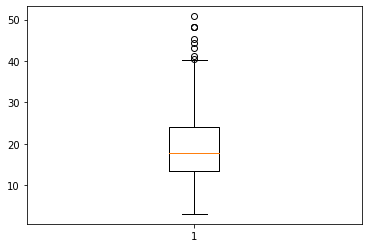

In [8]:
plt.boxplot(t_bill)
plt.show()

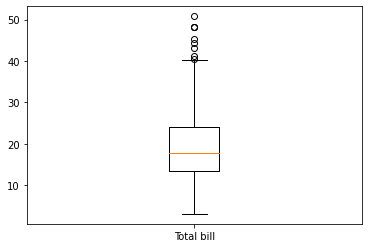

In [9]:
plt.boxplot(t_bill,labels=['Total bill'])
plt.show()

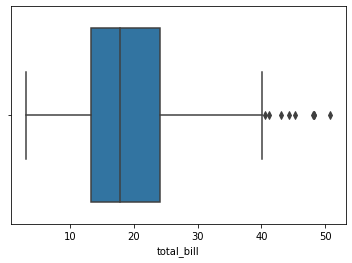

In [6]:
sns_bill=sns.boxplot(x='total_bill',data=tips)

In [10]:
t_tip=tips.tip

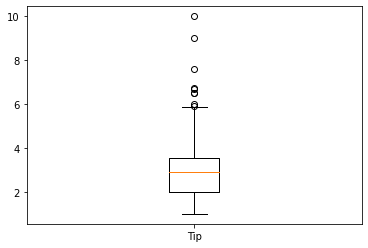

In [11]:
plt.boxplot(t_tip,labels=['Tip'])
plt.show()

<AxesSubplot:xlabel='size', ylabel='tip'>

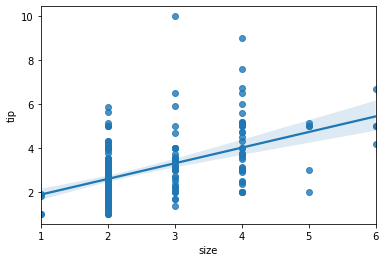

In [12]:
sns.regplot(x='size',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='tip'>

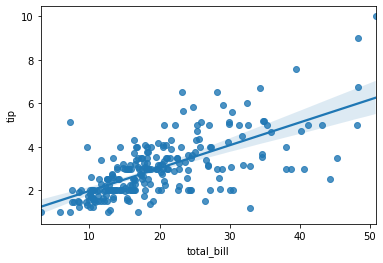

In [13]:
sns.regplot(x='total_bill',y='tip',data=tips)

<AxesSubplot:xlabel='total_bill', ylabel='Count'>

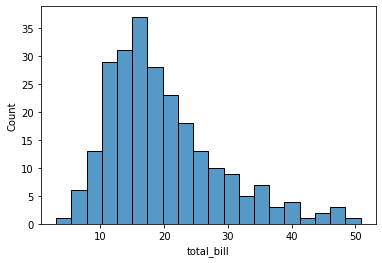

In [11]:
sns.histplot(x=t_bill,data=tips,bins=20)

C:\Users\SEC\anaconda3\envs\multi\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `histplot` (an axes-level function for histograms).
  warnings.warn(msg, FutureWarning)


<AxesSubplot:ylabel='Density'>

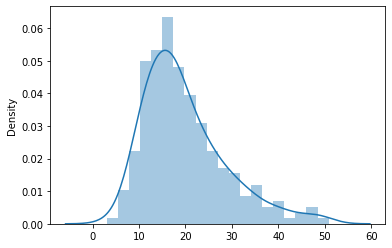

In [14]:
sns.distplot(x=t_bill,bins=20)

<AxesSubplot:xlabel='total_bill'>

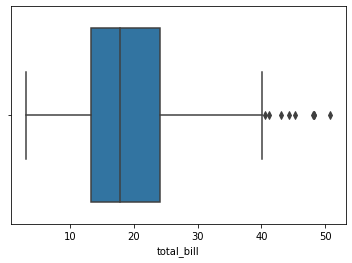

In [13]:
sns.boxplot(x=tips.total_bill)

In [15]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
dtypes: float64(2), int64(1), object(4)
memory usage: 13.5+ KB


In [16]:
pd.crosstab(index=tips['size'],columns='count')

col_0,count
size,
1,4
2,156
3,38
4,37
5,5
6,4


In [17]:
size=pd.crosstab(index=tips['size'],columns='count')

<AxesSubplot:xlabel='size'>

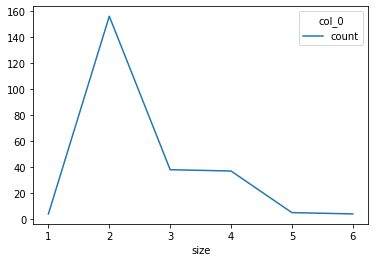

In [20]:
size.plot()

<AxesSubplot:xlabel='size'>

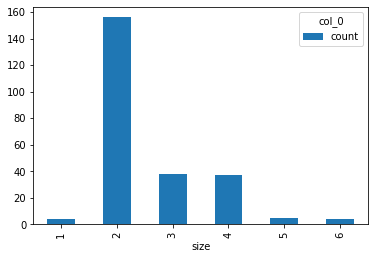

In [19]:
size.plot.bar()

In [21]:
size_tip=pd.crosstab(index=tips['size'],columns=tips['tip'])

In [22]:
# size_tip.plot.bar()

In [23]:
size_total=pd.crosstab(index=tips['size'],columns=tips['total_bill'])

In [24]:
tips[tips["time"] == "Lunch"].total_bill.describe()

count    68.000000
mean     17.168676
std       7.713882
min       7.510000
25%      12.235000
50%      15.965000
75%      19.532500
max      43.110000
Name: total_bill, dtype: float64

In [25]:
tip_rate=tips['tip']/tips['total_bill']

In [26]:
tips['tip_rate']=tip_rate

In [27]:
tips.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 244 entries, 0 to 243
Data columns (total 8 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   total_bill  244 non-null    float64
 1   tip         244 non-null    float64
 2   sex         244 non-null    object 
 3   smoker      244 non-null    object 
 4   day         244 non-null    object 
 5   time        244 non-null    object 
 6   size        244 non-null    int64  
 7   tip_rate    244 non-null    float64
dtypes: float64(3), int64(1), object(4)
memory usage: 15.4+ KB


In [29]:
tips.describe()

,total_bill,tip,size,tip_rate
count,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,2.569672,0.160803
std,8.902412,1.383638,0.951100,0.061072
min,3.070000,1.000000,1.000000,0.035638
25%,13.347500,2.000000,2.000000,0.129127
50%,17.795000,2.900000,2.000000,0.154770
75%,24.127500,3.562500,3.000000,0.191475
max,50.810000,10.000000,6.000000,0.710345


In [30]:
top_tip=tips['tip_rate']>0.7

In [31]:
tips[top_tip]

,total_bill,tip,sex,smoker,day,time,size,tip_rate
172,7.25,5.15,Male,Yes,Sun,Dinner,2,0.710345


In [25]:
import pandas_profiling

In [26]:
tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

[]

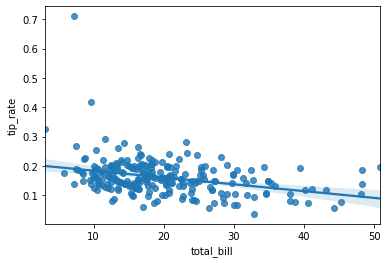

In [27]:
data = sns.regplot(x='total_bill',y='tip_rate',data=tips)
data.plot()

In [28]:
tips.corr()

,total_bill,tip,size,tip_rate
total_bill,1.000000,0.675734,0.598315,-0.338624
tip,0.675734,1.000000,0.489299,0.342370
size,0.598315,0.489299,1.000000,-0.142860
tip_rate,-0.338624,0.342370,-0.142860,1.000000


<AxesSubplot:>

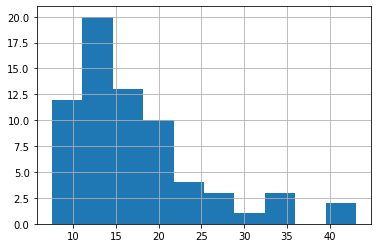

In [29]:
tips[tips["time"] == "Lunch"].total_bill.hist()

In [32]:
tips['sex']=tips.sex.replace({'Female':0,'Male': 1})

In [33]:
tips.smoker=tips.smoker.replace({'No':0,'Yes':1})

In [34]:
tips.day=tips.day.replace({'Thur':0,'Fri':1,'Sat':2,'Sun':3})

In [35]:
tips.time=tips.time.replace({'Lunch':0,'Dinner':1})

In [37]:
tips.describe()

,total_bill,tip,sex,smoker,day,time,size,tip_rate
count,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000,244.000000
mean,19.785943,2.998279,0.643443,0.381148,1.725410,0.721311,2.569672,0.160803
std,8.902412,1.383638,0.479967,0.486667,1.155774,0.449276,0.951100,0.061072
min,3.070000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.035638
25%,13.347500,2.000000,0.000000,0.000000,0.000000,0.000000,2.000000,0.129127
50%,17.795000,2.900000,1.000000,0.000000,2.000000,1.000000,2.000000,0.154770
75%,24.127500,3.562500,1.000000,1.000000,3.000000,1.000000,3.000000,0.191475
max,50.810000,10.000000,1.000000,1.000000,3.000000,1.000000,6.000000,0.710345


In [35]:
tips.profile_report()

Summarize dataset:   0%|          | 0/21 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

In [36]:
tips['day'].value_counts()

2    87
3    76
0    62
1    19
Name: day, dtype: int64

In [37]:
tips.groupby(tips.day).count()

,total_bill,tip,sex,smoker,time,size,tip_rate
day,,,,,,,
0,62,62,62,62,62,62,62
1,19,19,19,19,19,19,19
2,87,87,87,87,87,87,87
3,76,76,76,76,76,76,76


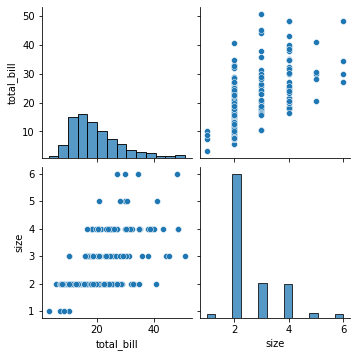

In [38]:
sns.pairplot(tips.loc[:,['total_bill','size']])